In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\katch\Desktop\projects\stock_portfolio\notebooks\Data\un_processed_data\stock_price_with_indicators.csv')
df.head(10)

,Date,Ticker,Close,High,Low,Open,Volume,SMA_20,SMA_50,SMA_100,...,Fib_23,Fib_38,Fib_50,Fib_61,Fib_78,Fib_100,OBV,GK,DC_Upper,DC_Lower
0,2020-06-30,ABB.NS,917.585205,924.994890,880.487866,903.789474,259932.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,0.0,0.033574,NaN,NaN
1,2020-07-01,ABB.NS,930.405884,939.863024,896.038486,915.537719,174484.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,174484.0,0.032246,NaN,NaN
2,2020-07-02,ABB.NS,939.278076,954.487454,931.185847,941.812953,161432.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,335916.0,0.017396,NaN,NaN
3,2020-07-03,ABB.NS,954.974915,963.262088,916.463930,940.837971,320566.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,656482.0,0.033974,NaN,NaN
4,2020-07-06,ABB.NS,958.777283,991.535969,951.757547,957.412313,398732.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,1055214.0,0.028939,NaN,NaN
5,2020-07-07,ABB.NS,937.328064,964.188243,933.281950,962.774537,298448.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,756766.0,0.015923,NaN,NaN
6,2020-07-08,ABB.NS,920.997559,947.175255,918.413886,943.762890,194584.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,562182.0,0.015656,NaN,NaN
7,2020-07-09,ABB.NS,905.251892,931.088376,902.863224,923.288683,124766.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,437416.0,0.017985,NaN,NaN
8,2020-07-10,ABB.NS,893.991028,913.295255,891.992369,906.714264,109164.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,328252.0,0.014191,NaN,NaN
9,2020-07-13,ABB.NS,891.992432,902.180733,887.215096,898.914636,76563.0,NaN,NaN,NaN,...,7134.565677,5929.728222,4955.955485,3982.182748,2595.794444,829.799819,251689.0,0.010808,NaN,NaN


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Range'] = df['High'] - df['Low']
df['Change'] = df['Close'] - df['Open']
df['Return_%'] = (df['Close'] - df['Open']) / df['Open'] * 100
df['daily_return']=df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change())
df['Avg_Price'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df['Volatility'] = (df['High'] - df['Low']) / df['Open'] * 100
df['log_open'] = df.groupby('Ticker')['Open'].transform(lambda x: np.log(x))
df['log_close'] = df.groupby('Ticker')['Close'].transform(lambda x: np.log(x))
df['log_high'] = df.groupby('Ticker')['High'].transform(lambda x: np.log(x))
df['log_low'] = df.groupby('Ticker')['Low'].transform(lambda x: np.log(x))


In [7]:
df.head()

,Date,Ticker,Close,High,Low,Open,Volume,SMA_20,SMA_50,SMA_100,...,Year,Month,Day,DayOfWeek,Range,Change,Return_%,daily_return,Avg_Price,Volatility
0,2020-06-30,ABB.NS,917.585205,924.994890,880.487866,903.789474,259932.0,NaN,NaN,NaN,...,2020,6,30,1,44.507024,13.795732,1.526432,NaN,906.714359,4.924490
1,2020-07-01,ABB.NS,930.405884,939.863024,896.038486,915.537719,174484.0,NaN,NaN,NaN,...,2020,7,1,2,43.824538,14.868165,1.623982,0.013972,920.461278,4.786754
2,2020-07-02,ABB.NS,939.278076,954.487454,931.185847,941.812953,161432.0,NaN,NaN,NaN,...,2020,7,2,3,23.301607,-2.534876,-0.269149,0.009536,941.691082,2.474123
3,2020-07-03,ABB.NS,954.974915,963.262088,916.463930,940.837971,320566.0,NaN,NaN,NaN,...,2020,7,3,4,46.798158,14.136944,1.502591,0.016712,943.884726,4.974093
4,2020-07-06,ABB.NS,958.777283,991.535969,951.757547,957.412313,398732.0,NaN,NaN,NaN,...,2020,7,6,0,39.778422,1.364970,0.142569,0.003982,964.870778,4.154785


In [8]:
df=df.dropna()
df.head()

,Date,Ticker,Close,High,Low,Open,Volume,SMA_20,SMA_50,SMA_100,...,Year,Month,Day,DayOfWeek,Range,Change,Return_%,daily_return,Avg_Price,Volatility
199,2021-04-15,ABB.NS,1322.670898,1336.883154,1283.072709,1290.374820,426291.0,1365.525891,1420.582737,1309.531609,...,2021,4,15,3,53.810446,32.296078,2.502845,0.022620,1308.250395,4.170141
200,2021-04-16,ABB.NS,1344.136475,1347.665011,1318.603491,1325.072494,142921.0,1362.061035,1420.355342,1312.398074,...,2021,4,16,4,29.061520,19.063980,1.438712,0.016229,1333.869368,2.193202
201,2021-04-19,ABB.NS,1372.468140,1389.044174,1293.080061,1334.938346,177488.0,1360.125494,1419.470361,1315.884539,...,2021,4,19,0,95.964113,37.529794,2.811350,0.021078,1347.382680,7.188655
202,2021-04-20,ABB.NS,1372.714233,1394.946789,1358.646668,1372.320712,173676.0,1358.812396,1418.550120,1318.672654,...,2021,4,20,1,36.300120,0.393521,0.028676,0.000179,1374.657101,2.645163
203,2021-04-22,ABB.NS,1369.025024,1377.239249,1346.153015,1372.320537,93857.0,1357.973999,1416.172112,1321.848283,...,2021,4,22,3,31.086233,-3.295513,-0.240142,-0.002688,1366.184456,2.265231


In [9]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
nc=list(num_cols)
nc

['Close',
 'High',
 'Low',
 'Open',
 'Volume',
 'SMA_20',
 'SMA_50',
 'SMA_100',
 'SMA_200',
 'EMA_50',
 'EMA_100',
 'EMA_200',
 'upper_band_bb',
 'lower_band_bb',
 'Pivot',
 'S1',
 'S2',
 'S3',
 'R1',
 'R2',
 'R3',
 'Tenkan_Sen',
 'Kijun_Sen',
 'Senkou_Span_A',
 'Senkou_Span_B',
 'Chikou_Span',
 'EMA_12',
 'EMA_26',
 'MACD',
 'Signal',
 'MACD_Histogram',
 'RSI',
 'ATR',
 'so_K',
 'so_D',
 'SAR',
 'Fib_0',
 'Fib_23',
 'Fib_38',
 'Fib_50',
 'Fib_61',
 'Fib_78',
 'Fib_100',
 'OBV',
 'GK',
 'DC_Upper',
 'DC_Lower',
 'log_open',
 'log_close',
 'log_high',
 'log_low',
 'Year',
 'Month',
 'Day',
 'DayOfWeek',
 'Range',
 'Change',
 'Return_%',
 'daily_return',
 'Avg_Price',
 'Volatility']

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import datetime 


def create_sequences(scaled_data, lookback, target_indices):
    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i, :])  
        y.append(scaled_data[i, target_indices]) 
    return np.array(X), np.array(y)

def transformation(df, target_col=['Close', 'Open', 'High', 'Low'], lookback=52, final_dict=None):
    if final_dict is None:
        final_dict = {}
    for ticker, group in df.groupby('Ticker'):
        group = group.sort_values('Date')
        num_cols = group.select_dtypes(include=np.number).columns.tolist()
        mm = MinMaxScaler()
        scaled_data = mm.fit_transform(group[num_cols])
        target_indices = [num_cols.index(col) for col in target_col]
        X, y = create_sequences(scaled_data, lookback, target_indices)
        # Train-test split
        split = int(0.8 * len(X))
        final_dict[ticker] = {
            'x_train': X[:split],
            'y_train': y[:split],
            'x_test': X[split:],
            'y_test': y[split:],
            'scaler': mm,
            'num_cols': num_cols,
            'target_cols': target_col,
            'target_indices': target_indices
        }
        
    return final_dict



def transformation(df, target_col=['Close', 'Open', 'High', 'Low'], lookback=52, final_dict=None):
    if final_dict is None:
        final_dict = {}
    for ticker, group in df.groupby('Ticker'):
        group = group.sort_values('Date')
        num_cols = group.select_dtypes(include=np.number).columns.tolist()
        mm = MinMaxScaler()
        scaled_data = mm.fit_transform(group[num_cols])
        target_indices = [num_cols.index(col) for col in target_col]
        X, y = create_sequences(scaled_data, lookback, target_indices)
        # Train-test split
        split = int(0.8 * len(X))
        final_dict[ticker] = {
            'x_train': X[:split],
            'y_train': y[:split],
            'x_test': X[split:],
            'y_test': y[split:],
            'scaler': mm,
            'num_cols': num_cols,
            'target_cols': target_col,
            'target_indices': target_indices
        }
        
    return final_dict

In [11]:
final_dict=transformation(df)

In [20]:
import numpy as np
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# List of 5 stocks you want to tune
tickers_to_tune = list(final_dict.keys())  # or manually: ['RELIANCE.NS', 'TCS.NS', ...]

# Parameter grid
param_grid = [
    {'units': 32, 'dropout': 0.1, 'lr': 0.001, 'batch': 32, 'epochs': 10},
    {'units': 64, 'dropout': 0.2, 'lr': 0.0005, 'batch': 32, 'epochs': 15},
    {'units': 128, 'dropout': 0.3, 'lr': 0.0001, 'batch': 64, 'epochs': 20},
]

best_models = {}

for ticker in tickers_to_tune:
    print(f"\n🔍 Tuning model for: {ticker}")
    data = final_dict[ticker]
    x_train = data['x_train']
    y_train = data['y_train']

    # Skip if too small
    if x_train.shape[0] < 200:
        print(f"Skipping {ticker} — insufficient data")
        continue

    x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    best_score = float('inf')
    best_model = None
    best_params = None

    for config in param_grid:
        model = Sequential([
            LSTM(config['units'], input_shape=(x_train.shape[1], x_train.shape[2])),
            Dropout(config['dropout']),
            Dense(32, activation='relu'),
            Dense(y_train.shape[1])  # output size dynamic
        ])
        optimizer = Adam(learning_rate=config['lr'])
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

        es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        model.fit(x_tr, y_tr,
                  validation_data=(x_val, y_val),
                  epochs=config['epochs'],
                  batch_size=config['batch'],
                  callbacks=[es],
                  verbose=0)

        preds = model.predict(x_val)
        score = mean_squared_error(y_val, preds)

        if score < best_score:
            best_score = score
            best_model = model
            best_params = config

    best_models[ticker] = {'model': best_model, 'params': best_params, 'score': best_score}
    print(f"✅ Best for {ticker}: {best_params}, MSE={best_score:.4f}")



🔍 Tuning model for: ABB.NS
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ Best for ABB.NS: {'units': 64, 'dropout': 0.2, 'lr': 0.0005, 'batch': 32, 'epochs': 15}, MSE=0.0005

🔍 Tuning model for: ADANIGREEN.NS
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Best for ADANIGREEN.NS: {'units': 64, 'dropout': 0.2, 'lr': 0.0005, 'batch': 32, 'epochs': 15}, MSE=0.0018

🔍 Tuning model for: ADANIPORTS.NS
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ Best for ADANIPORTS.NS: {'units': 32, 'dropout': 0.1, 'lr': 0.001, 'batch': 32, 'epochs': 10}, MSE=0.0011

🔍 Tuning model for: BANKBEES.NS
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ Best for BANKBEES.NS: {'units': 32, 'dropout': 0.1, 'lr': 0.001, 'batch': 32, 'epochs': 10},

In [25]:
from sklearn.metrics import r2_score

def create_model_for_data(x_train, y_train, units=64, dropout_rate=0.2, learning_rate=0.0005):
    input_shape = x_train.shape[1:]  # (lookback, features)
    output_dim = y_train.shape[1] if len(y_train.shape) > 1 else 1

    model = Sequential()
    model.add(LSTM(units, input_shape=input_shape, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_dim))  # output layer

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Train and evaluate for each stock
model_dict = {}

for ticker, data in final_dict.items():
    try:
        print(f"\n🔁 Training model for: {ticker}")
        
        x_train = data['x_train']
        y_train = data['y_train']
        x_test = data['x_test']
        y_test = data['y_test']

        model = create_model_for_data(x_train, y_train)
        history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=0)

        y_pred = model.predict(x_test)

        r2 = r2_score(y_test, y_pred)
        mse = np.mean((y_test - y_pred) ** 2)
        rmse = np.sqrt(mse)

        print(f"✅ {ticker} - R²: {r2:.4f}, RMSE: {rmse:.4f}, MSE: {mse:.4f}")

        model_dict[ticker] = {
            'model': model,
            'history': history.history,
            'r2_score': r2,
            'mse': mse,
            'rmse': rmse
        }

    except Exception as e:
        print(f"❌ Error with {ticker}: {e}")



🔁 Training model for: ABB.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
✅ ABB.NS - R²: 0.7220, RMSE: 0.0760, MSE: 0.0058

🔁 Training model for: ADANIGREEN.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
✅ ADANIGREEN.NS - R²: 0.8844, RMSE: 0.0556, MSE: 0.0031

🔁 Training model for: ADANIPORTS.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
✅ ADANIPORTS.NS - R²: 0.8243, RMSE: 0.0504, MSE: 0.0025

🔁 Training model for: BANKBEES.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
✅ BANKBEES.NS - R²: -0.0519, RMSE: 0.0800, MSE: 0.0064

🔁 Training model for: BEL.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
✅ BEL.NS - R²: 0.3008, RMSE: 0.0532, MSE: 0.0028

🔁 Training model for: BHEL.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
✅ BHEL.NS - R²: 0.6706, RMSE: 0.0610, MSE: 0.0037

🔁 Training model for: CDSL.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
✅ CDSL.NS - R²: -0.2073, RMSE: 0.1450, MSE: 0.0210

🔁 Training model for: CIPLA.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
✅ CIPLA.NS - R²: 0.1854, RMSE: 0.0773, MSE: 0.0060

🔁 Training mode

In [26]:
metrics_df = pd.DataFrame([
    {'Ticker': ticker, 'R2': m['r2_score'], 'RMSE': m['rmse'], 'MSE': m['mse']}
    for ticker, m in model_dict.items()
])
metrics_df = metrics_df.sort_values(by='R2', ascending=False)
print(metrics_df.head())


           Ticker        R2      RMSE       MSE
14        IDEA.NS  0.947870  0.044372  0.001969
35     YESBANK.NS  0.902033  0.034837  0.001214
28    RELIANCE.NS  0.895816  0.044325  0.001965
1   ADANIGREEN.NS  0.884421  0.055634  0.003095
18   KOTAKBANK.NS  0.875414  0.071758  0.005149


In [31]:
d=metrics_df[metrics_df['R2']<0.4].to_dict()
print(d)

{'Ticker': {8: 'CPSEETF.NS', 4: 'BEL.NS', 33: 'UTINEXT50.NS', 7: 'CIPLA.NS', 24: 'NIFTYBEES.NS', 31: 'SUZLON.NS', 21: 'MID150BEES.NS', 3: 'BANKBEES.NS', 6: 'CDSL.NS', 37: '^NSEI', 22: 'MON100.NS', 13: 'HINDZINC.NS', 30: 'SKIPPER.NS', 26: 'PGEL.NS', 34: 'VEDL.NS'}, 'R2': {8: 0.34278023728916274, 4: 0.3007978185551357, 33: 0.26089502960409244, 7: 0.18538909497524395, 24: 0.12084870051350916, 31: -0.039311898223562236, 21: -0.050673525447440054, 3: -0.05189270605795854, 6: -0.20732250441723643, 37: -0.5016574334726056, 22: -0.5665710145471672, 13: -1.2867125353446407, 30: -2.683238189045773, 26: -4.01209174010092, 34: -6.1388587488620185}, 'RMSE': {8: 0.06851097137290127, 4: 0.05317711461320105, 33: 0.10579646700877031, 7: 0.07728475357865139, 24: 0.06402608424385471, 31: 0.12281791155727563, 21: 0.08442056904711015, 3: 0.0799547802432137, 6: 0.14502256997865384, 37: 0.0800441342327223, 22: 0.11115074290833193, 13: 0.10892182917673346, 30: 0.20791139383769802, 26: 0.3289208806372489, 34: 

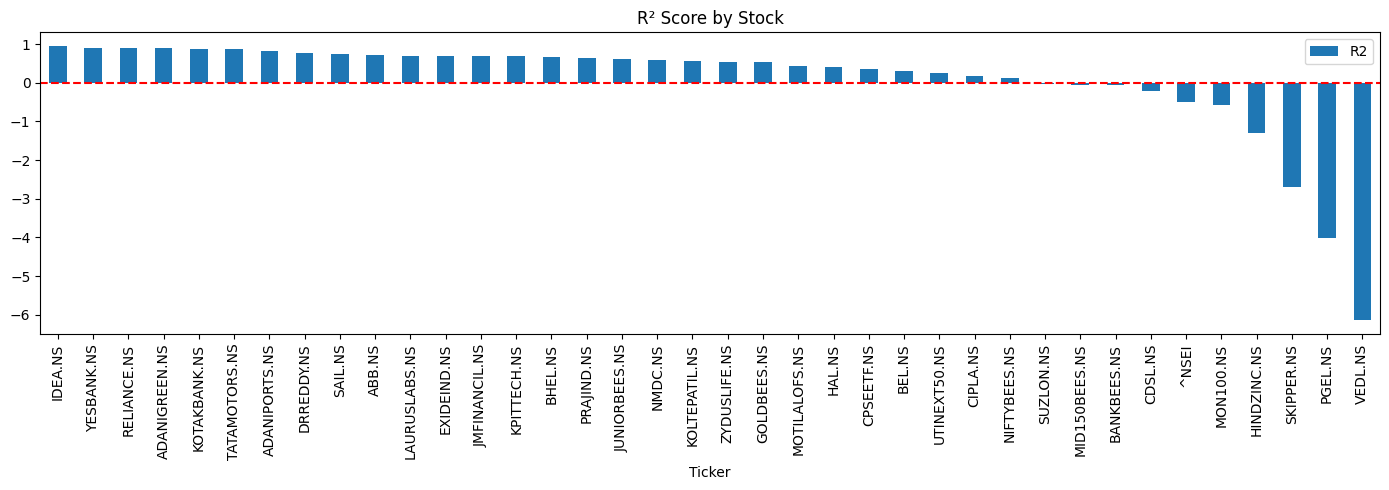

In [27]:
import matplotlib.pyplot as plt

metrics_df.plot(x='Ticker', y='R2', kind='bar', figsize=(14, 5), title='R² Score by Stock')
plt.axhline(0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [34]:

best_params = {
    "VEDL.NS": {"units": 64, "dropout": 0.2, "lr": 0.0005, "batch": 32, "epochs": 15},
    "^NSEI": {"units": 64, "dropout": 0.2, "lr": 0.0005, "batch": 32, "epochs": 15},
    "SKIPPER.NS": {"units": 64, "dropout": 0.2, "lr": 0.0005, "batch": 32, "epochs": 15},
    "MON100.NS": {"units": 32, "dropout": 0.1, "lr": 0.001, "batch": 32, "epochs": 10},
    "HINDZINC.NS": {"units": 32, "dropout": 0.1, "lr": 0.001, "batch": 32, "epochs": 10},
}

def create_model(units, dropout, lr, input_shape, output_dim):
    model = Sequential()
    model.add(LSTM(units, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_dim))
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae'])
    return model

# Results dictionary
results = {}

for ticker, params in best_params.items():
    print(f"\n🔁 Training with best parameters for: {ticker}")
    data = final_dict[ticker]

    x_train, y_train = data['x_train'], data['y_train']
    x_test, y_test = data['x_test'], data['y_test']

    input_shape = x_train.shape[1:]
    output_dim = y_train.shape[1] if len(y_train.shape) > 1 else 1

    model = create_model(params['units'], params['dropout'], params['lr'], input_shape, output_dim)

    model.fit(x_train, y_train,
              batch_size=params['batch'],
              epochs=params['epochs'],
              validation_split=0.1,
              verbose=0)

    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"✅ {ticker} - R²: {r2:.4f}, RMSE: {rmse:.4f}, MSE: {mse:.4f}")

    results[ticker] = {
        'r2_score': r2,
        'rmse': rmse,
        'mse': mse,
        'params': params
    }



🔁 Training with best parameters for: VEDL.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
✅ VEDL.NS - R²: -6.0778, RMSE: 0.1841, MSE: 0.0339

🔁 Training with best parameters for: ^NSEI
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ ^NSEI - R²: -1.2123, RMSE: 0.0969, MSE: 0.0094

🔁 Training with best parameters for: SKIPPER.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
✅ SKIPPER.NS - R²: -1.9559, RMSE: 0.1858, MSE: 0.0345

🔁 Training with best parameters for: MON100.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
✅ MON100.NS - R²: -0.9096, RMSE: 0.1225, MSE: 0.0150

🔁 Training with best parameters for: HINDZINC.NS
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
✅ HINDZINC.NS - R²: -2.4533, RMSE: 0.1325, MSE: 0.0176
